## D. Targeted Sentiment Analysis

In [1]:
# load required packages/libraries
import os
import time
import math
import re
from pprint import pprint
from textblob import TextBlob
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
import multiprocessing
import string

nltk.download('wordnet')
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

import warnings
warnings.filterwarnings("ignore")

import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from bertopic import BERTopic


2023-05-28 00:19:00.373290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 00:19:03.195280: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-05-28 00:19:03.195418: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

#### a) Data Extraction

In [2]:
# Load the dataset
tar_sen = pd.read_parquet('sentiment-dataset.parquet', engine='pyarrow')

# Check the shape of dataset
tar_sen.shape

(160842, 12)

In [3]:
# Convert 'date' column to datetime
tar_sen['date'] = pd.to_datetime(tar_sen['date'])

# Extract year and quarter
tar_sen['quarter'] = tar_sen['date'].dt.to_period('Q')

# Extract year
tar_sen['year'] = tar_sen['date'].dt.year


In [4]:
tar_sen.columns

Index(['url', 'date', 'language', 'title', 'text', 'cleaned_text',
       'lemmatized_text', 'num_tokens', 'token_bucket', 'sentiment',
       'entities', 'entity_labels', 'quarter', 'year'],
      dtype='object')

#### b) Targeted Sentiment Analysis

1. Elon Musk

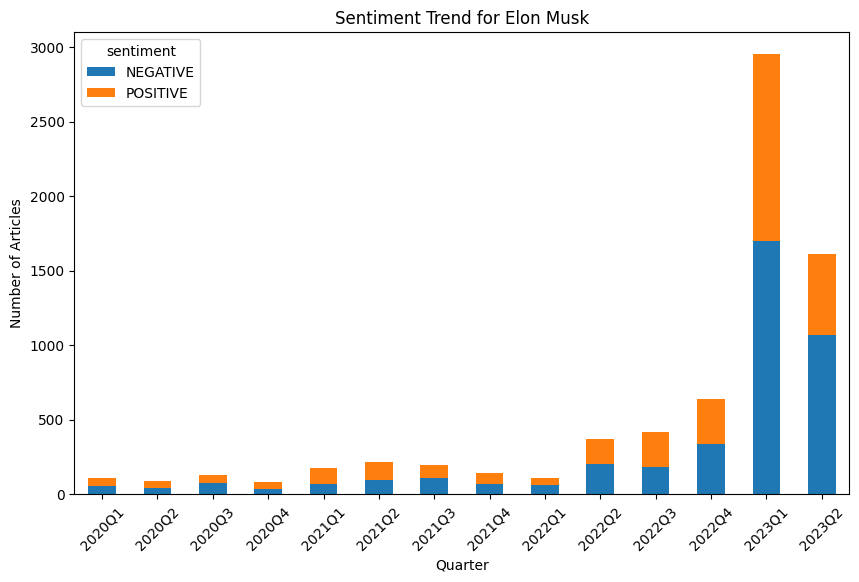

In [5]:
import matplotlib.pyplot as plt

# Filter out the rows related to Elon Musk
elon_musk_sentiments = tar_sen[tar_sen['entities'].apply(lambda x: 'Elon Musk' in x or 'Musk' in x)]

# Group the sentiments by quarter
quarterly_sentiments = elon_musk_sentiments.groupby(['quarter', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trend
quarterly_sentiments.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Trend for Elon Musk')
plt.ylabel('Number of Articles')
plt.xlabel('Quarter')
plt.xticks(rotation=45) # Rotate the x-axis labels to make them easier to read
plt.show()


2. Sam Altman

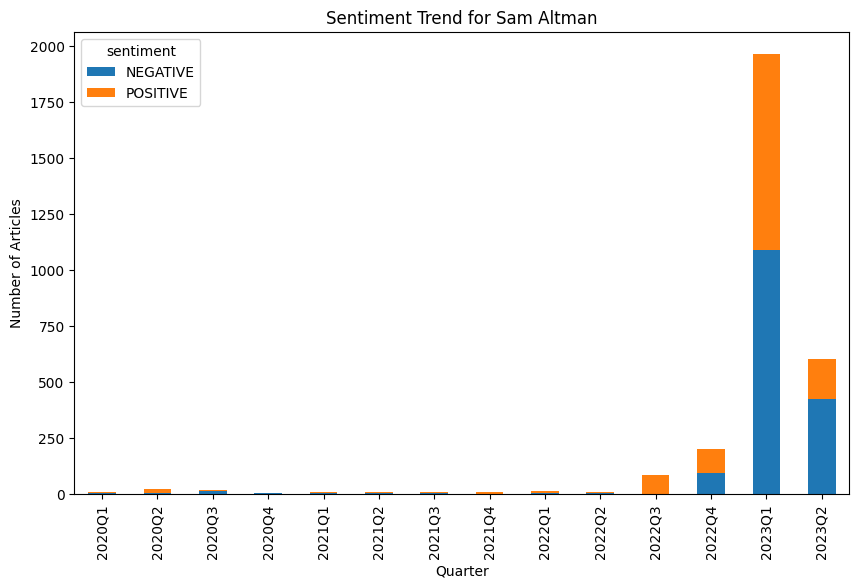

In [6]:
import matplotlib.pyplot as plt

# Filter out the rows related to Sam Altman
sam_sentiments = tar_sen[tar_sen['entities'].apply(lambda x: 'Sam Altman' in x)]

# Group the sentiments by quarter
quarterly_sentiments = sam_sentiments.groupby(['quarter', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trend
quarterly_sentiments.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Trend for Sam Altman')
plt.ylabel('Number of Articles')
plt.xlabel('Quarter')
plt.show()


3. Google

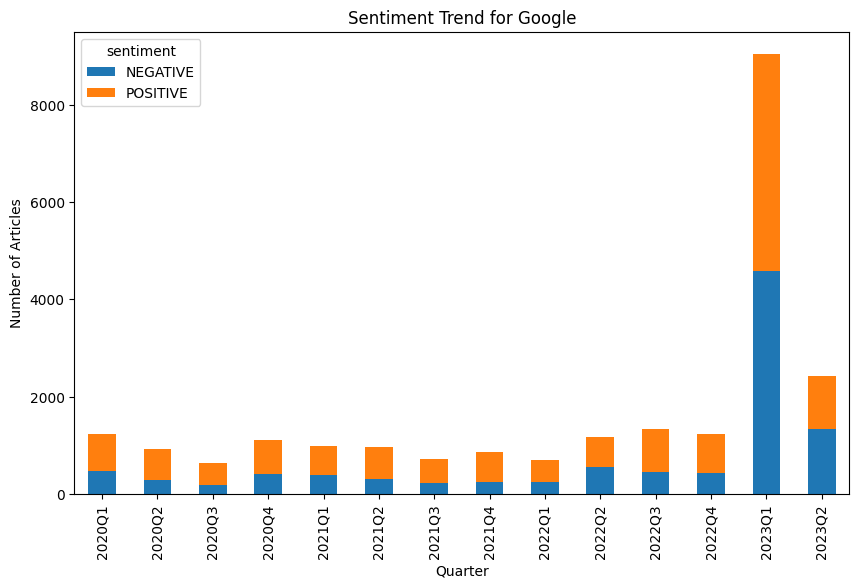

In [7]:
import matplotlib.pyplot as plt

# Filter out the rows related to Google
google_sentiments = tar_sen[tar_sen['entities'].apply(lambda x: 'Google' in x)]

# Group the sentiments by quarter
quarterly_sentiments = google_sentiments.groupby(['quarter', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trend
quarterly_sentiments.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Trend for Google')
plt.ylabel('Number of Articles')
plt.xlabel('Quarter')
plt.show()


4. Microsoft

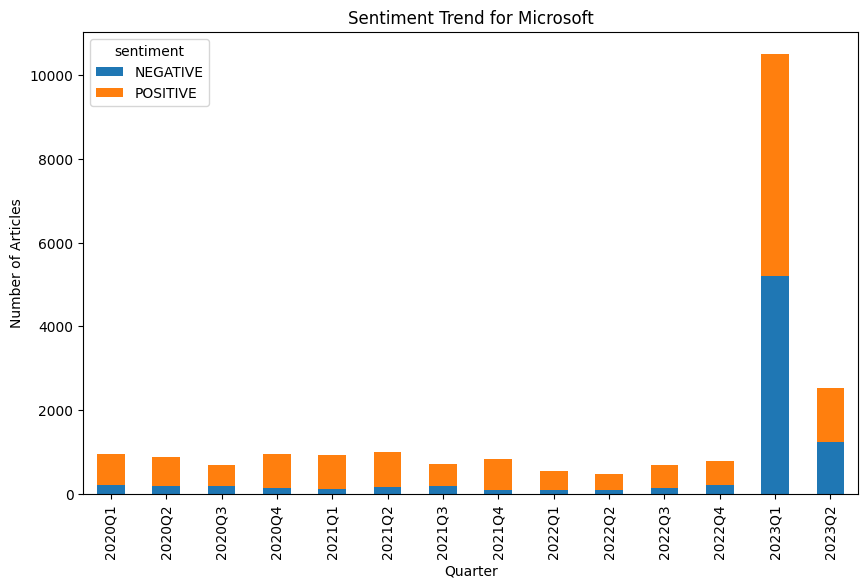

In [8]:
import matplotlib.pyplot as plt

# Filter out the rows related to Microsoft
microsoft_sentiments = tar_sen[tar_sen['entities'].apply(lambda x: 'Microsoft' in x)]

# Group the sentiments by quarter
quarterly_sentiments = microsoft_sentiments.groupby(['quarter', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trend
quarterly_sentiments.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Trend for Microsoft')
plt.ylabel('Number of Articles')
plt.xlabel('Quarter')
plt.show()


5. Bard

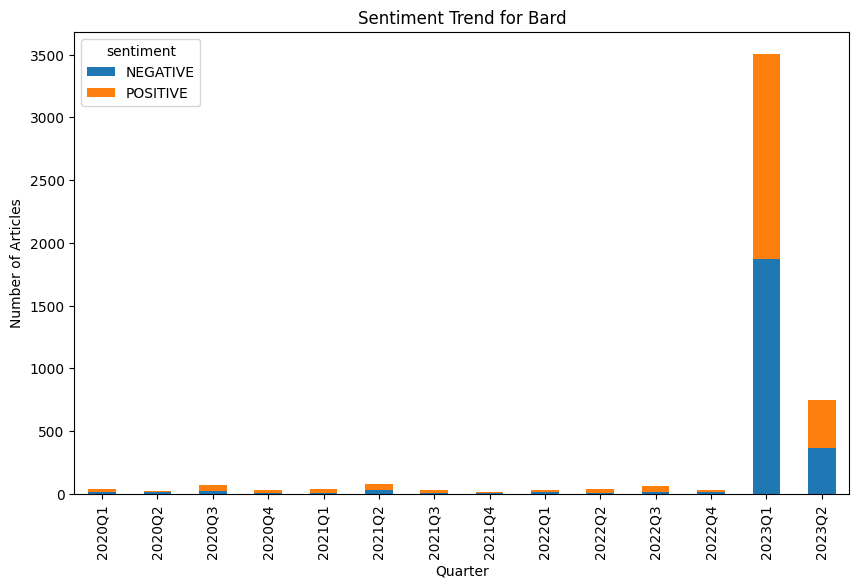

In [9]:
import matplotlib.pyplot as plt

# Filter out the rows related to Bard
bard_sentiments = tar_sen[tar_sen['entities'].apply(lambda x: 'Bard' in x)]

# Group the sentiments by quarter
quarterly_sentiments = bard_sentiments.groupby(['quarter', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trend
quarterly_sentiments.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Trend for Bard')
plt.ylabel('Number of Articles')
plt.xlabel('Quarter')
plt.show()


6. ChatGPT

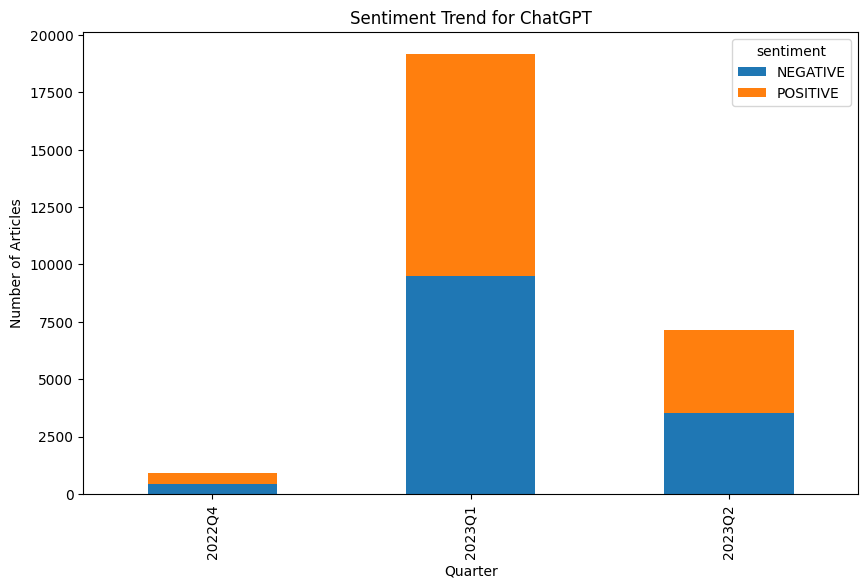

In [10]:
import matplotlib.pyplot as plt

# Filter out the rows related to ChatGPT
openai_sentiments = tar_sen[tar_sen['entities'].apply(lambda x: 'ChatGPT' in x)]

# Group the sentiments by quarter
quarterly_sentiments = openai_sentiments.groupby(['quarter', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trend
quarterly_sentiments.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Trend for ChatGPT')
plt.ylabel('Number of Articles')
plt.xlabel('Quarter')
plt.show()
